In [1]:
import pandas as pd
import numpy as np
from io import BytesIO
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

import requests 
from urllib.parse import urlencode 

## 1. Первичная загрузка данных
Подключаем API яндекс и скачиваем данные через публичные ссылки

In [2]:
 # используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'  

#### 1.1 olist_customers_datase.csv

In [3]:
public_key = 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg'

In [4]:
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в df 
download_response = requests.get(download_url) 
customers = pd.read_csv(download_url) 

In [5]:
customers.head()

# customer_id — позаказный идентификатор пользователя
# customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
# customer_zip_code_prefix —  почтовый индекс пользователя
# customer_city —  город доставки пользователя
# customer_state —  штат доставки пользователя

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

#### 1.2 olist_orders_dataset.csv

In [7]:
public_key = 'https://disk.yandex.ru/d/0zWmh1bYP6REbw'

In [8]:
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в df 
download_response = requests.get(download_url) 
orders = pd.read_csv(download_url) 

In [9]:
orders.head()
# order_id —  уникальный идентификатор заказа (номер чека)
# customer_id —  позаказный идентификатор пользователя
# order_status —  статус заказа
# order_purchase_timestamp —  время создания заказа
# order_approved_at —  время подтверждения оплаты заказа
# order_delivered_carrier_date —  время передачи заказа в логистическую службу
# order_delivered_customer_date —  время доставки заказа
# order_estimated_delivery_date —  обещанная дата доставки

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [11]:
orders[orders.columns[3:8]] = orders[orders.columns[3:8]].apply(pd.to_datetime, errors='coerce')

In [12]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [13]:
# Уникальные статусы заказов в таблице olist_orders_dataset:

# created —  создан
# approved —  подтверждён
# invoiced —  выставлен счёт
# processing —  в процессе сборки заказа
# shipped —  отгружен со склада
# delivered —  доставлен пользователю
# unavailable —  недоступен
# canceled —  отменён

#### 1.3 olist_order_items_dataset.csv

In [14]:
public_key = 'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'

In [15]:
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в df 
download_response = requests.get(download_url) 
order_items = pd.read_csv(download_url) 

In [16]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [17]:
order_items.head()

# order_id —  уникальный идентификатор заказа (номер чека)
# order_item_id —  идентификатор товара внутри одного заказа
# product_id —  ид товара (аналог штрихкода)
# seller_id — ид производителя товара
# shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
# price —  цена за единицу товара
# freight_value —  вес товара

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## 2. Задачи

### 2.0. Определим, что мы можем считать покупкой.

In [18]:
# created —  создан
# approved —  подтверждён
# invoiced —  выставлен счёт
# processing —  в процессе сборки заказа
# shipped —  отгружен со склада
# delivered —  доставлен пользователю
# unavailable —  недоступен
# canceled —  отменён

Давайте определим, можем ли мы считать фактом покупки все заказы, в которых присуствует время подтверждения оплаты заказа (order_approved_at).


Можно увидеть, что заказы, по которым подтверждена оплата, представлены множеством различных статусов.

Так, часть заказов имеют статус canceled и unavailable. Эти заказы были оплачены, но отменены. Вероятнее всего по ним произошел вовзрат денежных средств. 

Также есть заказы с промежуточными статусами: processing, shipped, approved. По ним также может произойти отмена и возврат денежных средств.

Предлагаю все равно считать заказы в указанных выше статусах за покупку, а факт возвратов рассматривать отдельно.

In [19]:
orders[orders.order_approved_at.isna() == False].order_status.value_counts()

delivered      96464
shipped         1107
unavailable      609
canceled         484
invoiced         314
processing       301
approved           2
Name: order_status, dtype: int64

Помимо прочих есть заказы со статусом invoiced (выставлен счет), по которым также есть факт оплаты.
Вероятнее всего эти заказы уже были оплачены, но еще не были переведены в следующий статус (approved, processing и пр.)

Их также следует считать за покупку

In [20]:
orders[(orders.order_approved_at.isna() == False) & (orders.order_status == "invoiced")].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaT,NaT,2017-06-06
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaT,NaT,2017-12-20


Заказы без факта оплаты представлены 3 типами: 

created - заказ был создан, но еще не оплачен. Их не следует считать за покупку;  
canceled - заказ был отменен и не оплачен. Их не следует считать за покупку;  
delivered - заказ был доставлен, но не оплачен.


In [21]:
orders[orders.order_approved_at.isna()].order_status.value_counts()

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64

Изучим заказы со статусом "delivered", в которых отсуствует время подтверждения оплаты заказа

Факт наличия данных в столбцах order_delivered_carrier_date, order_delivered_customer_date говорит о том, что статус "delivered" проставлен верно: заказы действительно были доставлены.

In [22]:
orders[(orders.order_approved_at.isna()) & (orders.order_status == 'delivered')].sort_values('order_id')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
84999,2babbb4b15e6d2dfe95e2de765c97bce,74bebaf46603f9340e3b50c6b086f992,delivered,2017-02-18 17:15:03,NaT,2017-02-22 11:23:11,2017-03-03 18:43:43,2017-03-31
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20
72407,3c0b8706b065f9919d0505d3b3343881,d85919cb3c0529589c6fa617f5f43281,delivered,2017-02-17 15:53:27,NaT,2017-02-22 11:31:30,2017-03-03 11:47:47,2017-03-23
63052,51eb2eebd5d76a24625b31c33dd41449,07a2a7e0f63fd8cb757ed77d4245623c,delivered,2017-02-18 15:52:27,NaT,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
67697,88083e8f64d95b932164187484d90212,f67cd1a215aae2a1074638bbd35a223a,delivered,2017-02-18 22:49:19,NaT,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21


Посмотрим на состав продуктов в каждом из этих заказов

Ни один из продуктов, входящий в данные заказы не имеет стоимость (price) = 0 и вес товара (freight_value) = 0. Следовательно заказы также не были быть бесплатными.

Так как в датасете отсутствуют данные о наличии каких-либо скидок и промо предложений, предлагаю данные заказы также считать оплаченными и учитывать как совершенную покупку.

In [23]:
free_orders = orders[(orders.order_approved_at.isna()) & (orders.order_status == 'delivered')].order_id.to_list()
order_items[order_items.order_id.isin(free_orders)].sort_values('order_id').head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
8204,12a95a3c06dbaec84bcfb0e2da5d228a,1,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-02-21 12:05:55,79.99,15.77
19005,2babbb4b15e6d2dfe95e2de765c97bce,1,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-02-22 16:15:03,79.99,26.82
20473,2eecb0d85f281280f79fa00f9cec1a95,1,4fd676d9c4723d475026e40aeae56957,5fd924b4836098a5be0ecf81ba054ce0,2017-02-21 16:21:55,135.00,19.23
26393,3c0b8706b065f9919d0505d3b3343881,1,db8ed3d08891d16a2438a67ab3acb740,004c9cd9d87a3c30c522c48c4fc07416,2017-02-22 14:53:27,133.99,23.20
36128,51eb2eebd5d76a24625b31c33dd41449,1,7868a64aa111bbb4f41f8e1146c0becb,cca3071e3e9bb7d12640c9fbe2301306,2017-02-28 14:52:27,59.90,17.16


Для упрощения дальнейшего анализа для выбранных заказов добавим данные в столбец order_approved_at значение, равное order_delivered_carrier_date

In [24]:
orders.order_approved_at = np.where(orders.order_id.isin(free_orders),orders.order_delivered_carrier_date,orders.order_approved_at)


In [25]:
orders.loc[orders.order_id.isin(free_orders)].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,2017-02-23 12:04:47,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,2017-02-23 09:01:52,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,2017-02-22 16:25:25,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,2017-02-22 11:23:10,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,2017-02-22 11:23:11,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20


In [26]:
orders.order_approved_at.isna().value_counts()

False    99295
True       146
Name: order_approved_at, dtype: int64

### 2.1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [27]:
# общее количество уникальных пользователей
customers.customer_unique_id.nunique()

96096

In [28]:
# Определим количество покупок по каждому пользователю
purchases = orders.merge(customers, how = 'left', on = 'customer_id') \
        .query('order_approved_at.isna() == False') \
        .groupby('customer_unique_id', as_index = False) \
        .agg({'order_id':'nunique'}) \
        .rename(columns = {'order_id':'purchased_orders'}) \
        .sort_values('purchased_orders', ascending = False)
purchases[purchases['purchased_orders'] == 1]

,customer_unique_id,purchased_orders
65378,ae09e8b1b58f30e8e984d0d300c456ac,1
64997,ad0adff48be9c5f67cb35fd0895b42e7,1
64188,aae31ecc3f2805fcc4890910744da4ed,1
64083,aaa5346df3cc01e29402dc6c156557c3,1
64971,acfc41e34b586a5d6850f2a6b3ae0183,1
...,...,...
32472,5655ee330a79bd1fd1e5fb220c2436dd,1
32471,5655967ad654dc2d2affca3502631db7,1
32470,56556a95d541c4ca3745744d9aeebc00,1
32469,56550de806540216e8a5fd85d5597678,1


In [29]:
purchases.purchased_orders.sum()

99295

In [30]:
round(93061/96096 * 100)

97

Определим пользователей, которые совершили покупку только один раз

In [31]:
purchases[purchases['purchased_orders'] == 1]

,customer_unique_id,purchased_orders
65378,ae09e8b1b58f30e8e984d0d300c456ac,1
64997,ad0adff48be9c5f67cb35fd0895b42e7,1
64188,aae31ecc3f2805fcc4890910744da4ed,1
64083,aaa5346df3cc01e29402dc6c156557c3,1
64971,acfc41e34b586a5d6850f2a6b3ae0183,1
...,...,...
32472,5655ee330a79bd1fd1e5fb220c2436dd,1
32471,5655967ad654dc2d2affca3502631db7,1
32470,56556a95d541c4ca3745744d9aeebc00,1
32469,56550de806540216e8a5fd85d5597678,1


#### Ответ: 93061 пользователь или 97% всех пользователей совершил покупку только один раз

### 2.2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

##### 2.2.1. Вариант  1 - сколько заказов не доставляют из-за отмены или отсутствия товаров

Создадим копию датафрейма для работы

In [32]:
deliveries = orders.copy()
deliveries.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


Определим календарный месяц для даты создания заказы

In [33]:
deliveries ['order_purchase_timestamp_month'] = deliveries.order_purchase_timestamp.dt.month

In [34]:
deliveries.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2


Сгрупперуем данные по месяцам и причинам недоставки товаров. За факт недоставки будем считать купленные (order_approved_at != NaN) заказы со статусами canceled/ unavailable и наличием оценочной даты доставки (order_estimated_delivery_date !=0). 

In [35]:
# Как мы видим оценочная дата доставки есть у каждого заказа, соответственна дополнительная фильтрация по этому параметру не требуется
orders.order_estimated_delivery_date.isna().value_counts()

False    99441
Name: order_estimated_delivery_date, dtype: int64

###### Ответ:

In [36]:
deliveries \
    .query('order_approved_at.isna() == False') \
    .groupby(['order_status','order_purchase_timestamp_month'], as_index = False) \
    .agg({'order_id':'nunique'}) \
    .groupby('order_status',as_index = False) \
    .agg({'order_id':'mean'}) \
    .query('order_status.isin(["canceled","unavailable"])') \
    .rename(columns = {'order_id':'undelivered_orders'}) \
    .round(2)

,order_status,undelivered_orders
1,canceled,40.33
6,unavailable,50.75


##### 2.2.2. Вариант  2 - сколько заказов не доставляют вовремя

Создадим копию датафрейма для работы

In [37]:
delivery = 0

In [38]:
delivery = orders.copy()

Под недоставкой будем понимать доставку невовремя, когда фактический месяц доставки заказа курьером оказалось больше оценочного времени доставки

Сперва выделим месяц из столбца (order_estimated_delivery_date)

In [39]:
delivery['order_estimated_delivery_date_month'] = delivery.order_estimated_delivery_date.dt.month.fillna(0)
delivery['order_delivered_customer_date_month'] = delivery.order_delivered_customer_date.dt.month.fillna(0)

#####  Вывод: Динамика в количестве заказов равномерная

###### Определим время перехода с этапа на этап  для всех заказов

purchase_date - дата создания заказа 

time_to_approve - среднее время с момента регистрации заказа до момента подтверждения оплаты

time_to_delivery - среднее время с момента подтверждения оплаты до момента передачи доставки в логистическую компанию

time_to_customer - среднее время доставки с момента передачи доставки в логистическую компанию до момента получения заказа клиентом

total_time_to_delivery - среднее общее время доставки с момента регистрации заказа до момента получения заказа клиентом

In [40]:
delivery ['purchase_date'] = pd.to_datetime(delivery.order_purchase_timestamp).dt.round('d')
delivery['time_to_approve'] = (delivery.order_approved_at - pd.to_datetime(delivery.order_purchase_timestamp)).dt.round('min')
delivery['time_to_delivery'] = (delivery.order_delivered_carrier_date - delivery.order_approved_at).dt.round('min')
delivery['time_to_customer'] = (delivery.order_delivered_customer_date - delivery.order_delivered_carrier_date).dt.round('min')
delivery['total_time_to_delivery'] = (delivery.order_delivered_customer_date - delivery.order_approved_at).dt.round('min')
delivery.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_estimated_delivery_date_month,order_delivered_customer_date_month,purchase_date,time_to_approve,time_to_delivery,time_to_customer,total_time_to_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10,10.0,2017-10-02,0 days 00:11:00,2 days 08:48:00,6 days 01:30:00,8 days 10:18:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8,8.0,2018-07-25,1 days 06:43:00,0 days 11:07:00,12 days 00:57:00,12 days 12:03:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,8.0,2018-08-08,0 days 00:17:00,0 days 04:55:00,9 days 04:16:00,9 days 09:11:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12,12.0,2017-11-19,0 days 00:18:00,3 days 17:54:00,9 days 10:49:00,13 days 04:43:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,2.0,2018-02-14,0 days 01:02:00,0 days 21:26:00,1 days 22:30:00,2 days 19:57:00


Переупорядочим столбцы

In [41]:
delivery = delivery[['order_id',
 'customer_id',
 'order_status',
 'purchase_date',                  
 'order_purchase_timestamp',
 'order_approved_at',
 'time_to_approve',               
 'order_delivered_carrier_date',
 'time_to_delivery',
 'order_delivered_customer_date',
 'order_delivered_customer_date_month',
 'time_to_customer',
 'order_estimated_delivery_date',
 'order_estimated_delivery_date_month',
 'total_time_to_delivery']]

Определим сколько заказов в каждый месяц не доставляется 

Под недоставкой будем понимать доставку невовремя, когда фактический месяц доставки заказа курьером оказалось больше оценочного времени доставки

Больше всего задержка в доставке в явнваре

In [42]:
undelivered_orders_per_month = delivery [(delivery.order_estimated_delivery_date_month - delivery.order_delivered_customer_date_month) < 0] \
                                        .groupby('order_estimated_delivery_date_month', as_index = False) \
                                        .agg({'order_id':'nunique'}) \
                                        .rename(columns = {'order_id': 'undelivered_orders'}) \
                                        .round(2)
undelivered_orders_per_month

,order_estimated_delivery_date_month,undelivered_orders
0,1,2556
1,2,135
2,3,669
3,4,243
4,5,203
5,6,39
6,7,76
7,8,88
8,9,48
9,10,43


Определим количество доставок каждый месяц и добавим это значение к undelivered_orders_per_month

In [43]:
delivered_orders_per_month = delivery \
                             .query('order_delivered_customer_date_month.isna() == False') \
                             .groupby('order_estimated_delivery_date_month', as_index = False) \
                             .agg({'order_id':'nunique'}) \
                             .rename(columns = {'order_id': 'delivered_orders'}) \
                             .round(2)
undelivered_orders_per_month = undelivered_orders_per_month.merge(delivered_orders_per_month, on = 'order_estimated_delivery_date_month')


In [44]:
undelivered_orders_per_month = undelivered_orders_per_month[['order_estimated_delivery_date_month', \
                                                             'delivered_orders', \
                                                             'undelivered_orders']]

In [45]:
undelivered_orders_per_month

,order_estimated_delivery_date_month,delivered_orders,undelivered_orders
0,1,5610,2556
1,2,6620,135
2,3,11580,669
3,4,9001,243
4,5,11045,203
5,6,8299,39
6,7,10541,76
7,8,13767,88
8,9,6422,48
9,10,4213,43


Определим среднее время перехода с этапа на этап  для заказов не доставленных вовремя

In [46]:
def custom_mean(x):
    try:
        return x.fillna(pd.Timedelta(seconds=0)).mean().dt.round('min')
    except:
        return pd.to_timedelta([np.nan])
    
lst = ['time_to_approve','time_to_delivery','time_to_customer','total_time_to_delivery']
undelivery_time = delivery \
      [(delivery.order_estimated_delivery_date_month - delivery.order_delivered_customer_date_month) <0] \
      .groupby('order_estimated_delivery_date_month', as_index = False)[lst] \
      .apply(custom_mean) \
      .merge(undelivered_orders_per_month, on = 'order_estimated_delivery_date_month') \
      [['order_estimated_delivery_date_month', \
        'delivered_orders', \
        'undelivered_orders', \
        'time_to_approve', \
        'time_to_delivery', \
        'time_to_customer', \
        'total_time_to_delivery']]

undelivery_time

,order_estimated_delivery_date_month,delivered_orders,undelivered_orders,time_to_approve,time_to_delivery,time_to_customer,total_time_to_delivery
0,1,5610,2556,0 days 09:30:00,2 days 19:44:00,9 days 13:09:00,12 days 08:54:00
1,2,6620,135,0 days 19:35:00,7 days 00:56:00,40 days 05:03:00,47 days 05:59:00
2,3,11580,669,0 days 10:33:00,4 days 17:08:00,39 days 02:37:00,43 days 19:45:00
3,4,9001,243,0 days 08:47:00,4 days 05:18:00,47 days 05:54:00,51 days 11:11:00
4,5,11045,203,0 days 14:38:00,5 days 01:40:00,37 days 06:02:00,42 days 07:42:00
5,6,8299,39,0 days 16:22:00,9 days 04:59:00,49 days 08:51:00,58 days 13:50:00
6,7,10541,76,0 days 13:36:00,6 days 10:35:00,38 days 19:40:00,45 days 06:15:00
7,8,13767,88,0 days 09:45:00,5 days 12:10:00,34 days 22:55:00,40 days 11:05:00
8,9,6422,48,0 days 13:12:00,7 days 02:51:00,29 days 03:47:00,36 days 06:38:00
9,10,4213,43,0 days 18:15:00,9 days 03:21:00,32 days 03:38:00,41 days 07:00:00


Определим среднее время перехода с этапа на этап для заказов, доставленных вовремя и присоединим к датафрейму с шага выше

In [47]:
lst = ['time_to_approve','time_to_delivery','time_to_customer','total_time_to_delivery']
delivery_time = delivery \
      [((delivery.order_estimated_delivery_date_month - delivery.order_delivered_customer_date_month) > 0)] \
      .groupby('order_estimated_delivery_date_month', as_index = False)[lst] \
      .apply(custom_mean) \
      .rename(columns = {'time_to_approve':'time_to_approve_intime', \
               'time_to_delivery':'time_to_delivery_intime', \
               'time_to_customer':'time_to_customer_intime', \
               'total_time_to_delivery':'total_time_to_delivery_intime'})  \
     .merge(undelivery_time, how = 'right', on = 'order_estimated_delivery_date_month') \
      [['order_estimated_delivery_date_month', \
        'delivered_orders', \
        'undelivered_orders', \
        'time_to_approve_intime', \
        'time_to_approve', \
        'time_to_delivery_intime', \
        'time_to_delivery', \
        'time_to_customer_intime', \
        'time_to_customer', \
        'total_time_to_delivery_intime',
        'total_time_to_delivery']]
delivery_time

,order_estimated_delivery_date_month,delivered_orders,undelivered_orders,time_to_approve_intime,time_to_approve,time_to_delivery_intime,time_to_delivery,time_to_customer_intime,time_to_customer,total_time_to_delivery_intime,total_time_to_delivery
0,1,5610,2556,0 days 13:56:00,0 days 09:30:00,1 days 08:20:00,2 days 19:44:00,0 days 00:00:00,9 days 13:09:00,0 days 00:00:00,12 days 08:54:00
1,2,6620,135,0 days 09:44:00,0 days 19:35:00,2 days 14:39:00,7 days 00:56:00,7 days 15:39:00,40 days 05:03:00,10 days 04:07:00,47 days 05:59:00
2,3,11580,669,0 days 09:21:00,0 days 10:33:00,2 days 16:23:00,4 days 17:08:00,8 days 02:54:00,39 days 02:37:00,10 days 16:07:00,43 days 19:45:00
3,4,9001,243,0 days 06:05:00,0 days 08:47:00,2 days 11:57:00,4 days 05:18:00,6 days 19:34:00,47 days 05:54:00,9 days 04:00:00,51 days 11:11:00
4,5,11045,203,0 days 14:20:00,0 days 14:38:00,1 days 23:56:00,5 days 01:40:00,6 days 13:01:00,37 days 06:02:00,8 days 10:19:00,42 days 07:42:00
5,6,8299,39,0 days 09:26:00,0 days 16:22:00,2 days 02:25:00,9 days 04:59:00,6 days 23:38:00,49 days 08:51:00,9 days 00:31:00,58 days 13:50:00
6,7,10541,76,0 days 08:24:00,0 days 13:36:00,2 days 03:00:00,6 days 10:35:00,6 days 21:56:00,38 days 19:40:00,8 days 23:49:00,45 days 06:15:00
7,8,13767,88,0 days 10:35:00,0 days 09:45:00,2 days 02:46:00,5 days 12:10:00,6 days 04:34:00,34 days 22:55:00,8 days 05:30:00,40 days 11:05:00
8,9,6422,48,0 days 08:58:00,0 days 13:12:00,2 days 05:47:00,7 days 02:51:00,6 days 05:41:00,29 days 03:47:00,8 days 10:23:00,36 days 06:38:00
9,10,4213,43,0 days 10:17:00,0 days 18:15:00,2 days 06:14:00,9 days 03:21:00,6 days 15:51:00,32 days 03:38:00,8 days 20:15:00,41 days 07:00:00


In [48]:
delivery_time.describe()

,order_estimated_delivery_date_month,delivered_orders,undelivered_orders,time_to_approve_intime,time_to_approve,time_to_delivery_intime,time_to_delivery,time_to_customer_intime,time_to_customer,total_time_to_delivery_intime,total_time_to_delivery
count,11.000000,11.000000,11.000000,11,11,11,11,11,11,11,11
mean,6.000000,8361.363636,377.363636,0 days 10:16:27.272727272,0 days 13:19:43.636363636,2 days 06:03:21.818181818,6 days 15:20:05.454545454,6 days 06:12:38.181818181,34 days 19:47:00,8 days 07:30:38.181818181,41 days 11:07:05.454545454
std,3.316625,3092.886331,745.287766,0 days 02:23:37.360490207,0 days 03:37:13.350507622,0 days 09:38:37.332218412,2 days 14:14:37.299178816,2 days 03:39:01.826269302,10 days 23:26:26.564223682,2 days 20:30:58.625546246,11 days 13:57:34.397485601
min,1.000000,4213.000000,39.000000,0 days 06:05:00,0 days 08:47:00,1 days 08:20:00,2 days 19:44:00,0 days 00:00:00,9 days 13:09:00,0 days 00:00:00,12 days 08:54:00
25%,3.500000,6016.000000,49.500000,0 days 09:09:30,0 days 10:09:00,2 days 02:35:30,4 days 21:24:00,6 days 09:21:00,30 days 15:42:30,8 days 10:21:00,38 days 17:32:00
50%,6.000000,8299.000000,88.000000,0 days 09:44:00,0 days 13:12:00,2 days 05:47:00,6 days 10:35:00,6 days 17:31:00,37 days 06:02:00,8 days 23:49:00,42 days 07:42:00
75%,8.500000,10793.000000,223.000000,0 days 11:15:00,0 days 15:30:00,2 days 13:18:00,8 days 03:06:00,6 days 22:47:00,39 days 15:50:00,9 days 07:48:00,46 days 06:07:00
max,11.000000,13767.000000,2556.000000,0 days 14:20:00,0 days 19:35:00,2 days 19:10:00,11 days 17:59:00,8 days 02:54:00,49 days 08:51:00,10 days 16:07:00,58 days 13:50:00


Сравним среднее время перехода с этапа на этап заказов, недоставленных вовремя, с заказами, доставленными вовремя.

1) time_to_approve_time.mean() - отличается на ~3 часа, что незначительно на периоде анализа сроков доставки в 1 месяц

2) time_to_delivery_intime.mean()  - отличается на ~4 дня, что оказывает среднее влияние на периоде анализа сроков доставки в 1 месяц

3) time_to_customer_intime.mean()  - отличается более, чем на 28 дней! 

При этом количество доставляемых вовремя заказов в августе выше, чем в январе, однако количество недоставлемых заказов вовремя все равно ниже. Следовательно в январе наблюдается резкий рост нагрузки на логистическую компанию

##### Вывод: логистическая компания не справляется с нагрузкой по заказам в январе. При этом это связано не с ростом заказов со стороны маркетплейса, а со стороны других заказчиков. 

Дополнительно проанализируем, оказывает ли влияние на недоставку заказа в конкретный месяц дата заказа: если заказ осуществляется в последнюю неделю, то срок доставки переносится на следующий месяц.

Для этого определим в какой день недели чаще всего делали заказы по месяцам

In [49]:
delivery ['purchase_day'] = delivery.purchase_date.dt.day
delivery ['purchase_month'] = delivery.purchase_date.dt.month
delivery ['purchase_year'] = delivery.purchase_date.dt.year

In [50]:
purchases_by_date = delivery \
    .groupby(['purchase_year','purchase_month','purchase_day'], as_index = False) \
    .agg({'order_purchase_timestamp':'nunique'}) \
    .sort_values('order_purchase_timestamp', ascending = False)

purchases_by_date

,purchase_year,purchase_month,purchase_day,order_purchase_timestamp
338,2017,11,25,974
337,2017,11,24,594
340,2017,11,27,417
589,2018,8,3,398
339,2017,11,26,394
...,...,...,...,...
12,2016,10,22,1
619,2018,9,3,1
618,2018,9,1,1
13,2016,12,24,1


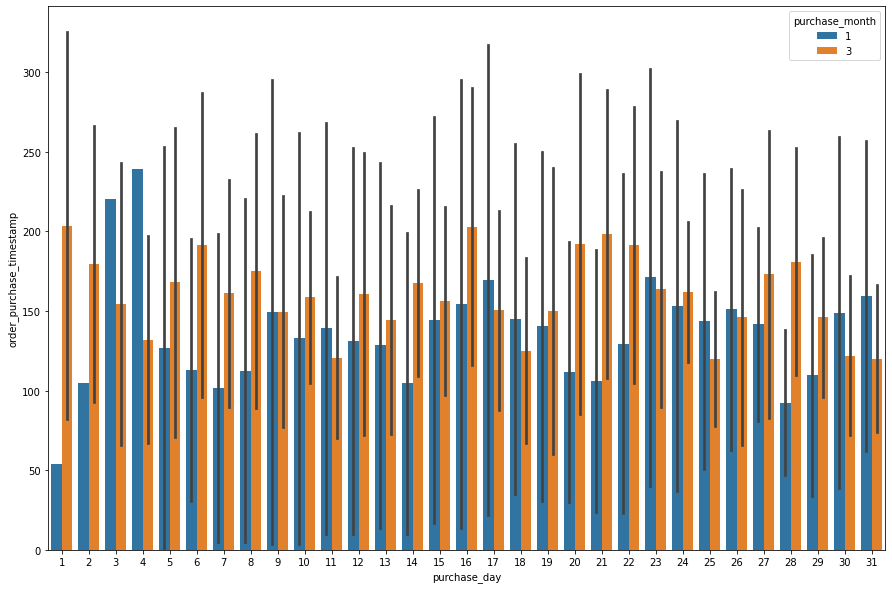

In [51]:
plt.figure(figsize = (15,10))
sns.barplot(data = purchases_by_date.query('(purchase_month == 1) | (purchase_month == 3) ')
            , x = 'purchase_day', y = 'order_purchase_timestamp', hue = 'purchase_month')

#####  Вывод: динамика равномерная, дополнительного влияния дня заказа на количество недоставленных заказов нет

### 2.3. По каждому товару определить, в какой день недели товар чаще всего покупается

In [52]:
orders_items_weekday = order_items.copy().merge(orders, how = 'left', on = 'order_id')
orders_items_weekday.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [53]:
orders_items_weekday['order_creation_weekday'] = orders_items_weekday.order_purchase_timestamp.dt.day_name()
orders_items_weekday['purchase_weekday'] = orders_items_weekday.order_approved_at.dt.day_name()

In [54]:
orders_items_weekday

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_creation_weekday,purchase_weekday
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,Wednesday,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,Wednesday,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,Sunday,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,Wednesday,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,Saturday,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,Monday,Wednesday
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,Saturday,Tuesday
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,Monday,Tuesday
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,Monday,Tuesday


In [55]:
purchases_by_weekday = orders_items_weekday \
    .query('order_approved_at.isna() == False') \
    .groupby(['product_id','purchase_weekday'], as_index = False) \
    .agg ({'order_id':'nunique'}) \
    .rename(columns = {'order_id':'purchases'}) \
    .sort_values(['product_id','purchase_weekday'],ascending = [False,True])
purchases_by_weekday

,product_id,purchase_weekday,purchases
61150,fffe9eeff12fcbd74a2f2b007dde0c58,Wednesday,1
61147,fffdb2d0ec8d6a61f0a0a0db3f25b441,Friday,1
61148,fffdb2d0ec8d6a61f0a0a0db3f25b441,Thursday,1
61149,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,3
61146,fff9553ac224cec9d15d49f5a263411f,Saturday,1
...,...,...,...
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1


####  В какой день недели каждый товар чаще всего покупается:

In [56]:
most_frequent_purchases = purchases_by_weekday \
                            .groupby(['product_id','purchase_weekday'],as_index = False) \
                            .agg({'purchases':'max'})\
                            .sort_values('purchases', ascending = False)
                        
most_frequent_purchases

,product_id,purchase_weekday,purchases
20156,53b36df67ebb7c41585e8d54d6772e08,Tuesday,97
41088,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,97
36580,99a4788cb24856965c36a24e339b6058,Tuesday,78
41083,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,77
41089,aca2eb7d00ea1a7b8ebd4e68314663af,Wednesday,74
...,...,...,...
23251,60a82b9f55ecd2035ad8d9c61e2afe18,Tuesday,1
23252,60a8d8f0434c4531bf310eebf9f19cfe,Friday,1
23253,60a8d8f0434c4531bf310eebf9f19cfe,Saturday,1
23254,60a8d8f0434c4531bf310eebf9f19cfe,Tuesday,1


### 2.4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть

In [57]:
orders_items_week = orders_items_weekday.merge(customers, on = 'customer_id')
orders_items_week.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_creation_weekday,purchase_weekday,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,Wednesday,Wednesday,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,Wednesday,Wednesday,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,Sunday,Sunday,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,Wednesday,Wednesday,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,Saturday,Saturday,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [58]:
orders_items_week['order_creation_week'] = orders_items_week.order_purchase_timestamp.dt.isocalendar().week
orders_items_week['purchase_week'] = orders_items_week.order_approved_at.dt.isocalendar().week
orders_items_week['order_creation_month'] = orders_items_week.order_purchase_timestamp.dt.month
orders_items_week['purchase_month'] = orders_items_week.order_approved_at.dt.month

In [59]:
orders_items_week

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_creation_weekday,purchase_weekday,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_creation_week,purchase_week,order_creation_month,purchase_month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,Wednesday,Wednesday,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,37,37,9,9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,Wednesday,Wednesday,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,17,17,4,4
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,Sunday,Sunday,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2,2,1,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,Wednesday,Wednesday,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,32,32,8,8
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,Saturday,Saturday,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,5,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,Monday,Wednesday,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,17,17,4,4
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,Saturday,Tuesday,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,28,29,7,7
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,Monday,Tuesday,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,43,43,10,10
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,Monday,Tuesday,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,33,33,8,8


In [60]:
purchases_by_customer_week = orders_items_week \
    .query('order_approved_at.isna() == False') \
    .groupby(['customer_unique_id','purchase_month','purchase_week'], as_index = False) \
    .agg ({'order_id':'nunique'}) \
    .rename(columns = {'order_id':'purchases'}) \
    .sort_values(['customer_unique_id','purchase_month','purchase_week'],ascending = [False,True,False])    
purchases_by_customer_week

,customer_unique_id,purchase_month,purchase_week,purchases
97615,ffffd2657e2aad2907e67c3e9daecbeb,5,18,1
97614,ffff5962728ec6157033ef9805bacc48,5,18,1
97613,ffff371b4d645b6ecea244b27531430a,2,6,1
97612,fffea47cd6d3cc0a88bd621562a9d061,12,49,1
97611,fffcf5a5ff07b0908bd4e2dbc735a684,6,23,1
...,...,...,...,...
4,0004aac84e0df4da2b147fca70cf8255,11,46,1
3,0000f6ccb0745a6a4b88665a16c9f078,10,41,1
2,0000f46a3911fa3c0805444483337064,3,10,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,5,19,1


In [61]:
purchases_by_customer_month = purchases_by_customer_week \
                                .groupby(['customer_unique_id','purchase_month'],as_index = False) \
                                .agg({'purchases':'mean'}) \
                                .sort_values('purchases',ascending = False)
purchases_by_customer_month

,customer_unique_id,purchase_month,purchases
7265,12f5d6e1cbf93dafd9dcc19095df0b3d,1,6.0
14377,25a560b9a6006157838aab1bdbd68624,4,4.0
50227,83e7958a94bd7f74a9414d8782f87628,1,4.0
76194,c8460e4251689ba205045f3ea17884a1,8,4.0
44463,74cb1ad7e6d5674325c1f99b5ea30d82,8,3.0
...,...,...,...
32561,5584edcd8b074bbd87e159db19a12525,2,1.0
32560,55845d91497951227fd70e450ffb35e0,2,1.0
32559,55840dd9a1ca54d819ce02d06bacde82,5,1.0
32558,55836600036b58714e3e52f3921fc36d,5,1.0


### 2.5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [62]:
cohorts = 0

Разобъем всех клиентов на когорты по дате первой покупки

In [63]:
cohorts = orders.copy().merge(customers, how = 'left', on = 'customer_id')
cohorts.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [64]:
cohorts['purchase_month'] = cohorts.order_purchase_timestamp.dt.month

Определим для каждого уникального пользователя месяц, в котором была совершена первая покупка

Этот показатель будем использовать для разделения пользователей на когорты

In [65]:
first_purchase_month = cohorts \
    .query('order_approved_at.isna() == False') \
    .groupby('customer_unique_id', as_index = False) \
    .agg({'purchase_month':'min'}) \
    .rename(columns = {'purchase_month':'cohort_month'})
first_purchase_month.head()

,customer_unique_id,cohort_month
0,0000366f3b9a7992bf8c76cfdf3221e2,5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,5
2,0000f46a3911fa3c0805444483337064,3
3,0000f6ccb0745a6a4b88665a16c9f078,10
4,0004aac84e0df4da2b147fca70cf8255,11


Добавим этот показатель к изначальной таблице

In [66]:
cohorts = cohorts.merge(first_purchase_month, on = 'customer_unique_id')
cohorts.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purchase_month,cohort_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,10,9
1,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9,9
2,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,7,7
3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,8,8
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,11,11


Построим сводную таблицу по количеству покупок в разрезе когорт

In [67]:
purchases_cohorts = cohorts \
    .query('order_approved_at.isna() == False') \
    .groupby(['cohort_month','purchase_month'], as_index = False) \
    .agg({'order_id':'nunique'}) \
    .pivot_table(index = 'cohort_month', columns = 'purchase_month', values = 'order_id', fill_value = 0)

purchases_cohorts

purchase_month,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
1,8067,43,42,31,37,27,31,48,23,6,39,26
2,0,8459,37,41,36,34,24,30,13,16,17,19
3,0,0,9809,54,45,49,29,27,14,21,25,23
4,0,0,0,9213,66,39,34,31,15,21,22,22
5,0,0,0,0,10379,64,55,42,21,29,26,17
6,0,0,0,0,0,9195,56,45,20,19,23,19
7,0,0,0,0,0,0,10083,68,22,20,22,11
8,0,0,0,0,0,0,0,10493,28,23,15,25
9,0,0,0,0,0,0,0,0,4130,23,18,11


Чтобы перейти от абсолютных показателей к относительным, посчитаем на основании данных выше retention в % по покупкам для каждой из когорот

In [68]:
# Создание переменных
lst = []
frame = pd.DataFrame()

In [69]:
# Итерация по сводной таблице и расчет retention в процентах
for i in purchases_cohorts:
    lst = (((purchases_cohorts[i]/(purchases_cohorts[i].max())))*100).round(3)
    frame = frame.append(lst)

In [70]:
# Форматирование получившейся таблицы
frame = frame.transpose()
frame.columns.name = 'purchase_month'
frame.index.name = 'cohort_month'

In [71]:
frame

purchase_month,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
1,100.0,0.508,0.428,0.336,0.356,0.294,0.307,0.457,0.557,0.126,0.534,0.478
2,0.0,100.000,0.377,0.445,0.347,0.370,0.238,0.286,0.315,0.336,0.233,0.349
3,0.0,0.000,100.000,0.586,0.434,0.533,0.288,0.257,0.339,0.441,0.343,0.422
4,0.0,0.000,0.000,100.000,0.636,0.424,0.337,0.295,0.363,0.441,0.301,0.404
5,0.0,0.000,0.000,0.000,100.000,0.696,0.545,0.400,0.508,0.608,0.356,0.312
6,0.0,0.000,0.000,0.000,0.000,100.000,0.555,0.429,0.484,0.399,0.315,0.349
7,0.0,0.000,0.000,0.000,0.000,0.000,100.000,0.648,0.533,0.420,0.301,0.202
8,0.0,0.000,0.000,0.000,0.000,0.000,0.000,100.000,0.678,0.483,0.206,0.459
9,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,100.000,0.483,0.247,0.202


In [72]:
df = 0

In [73]:
df = pd.DataFrame(columns = ['cohort_month','retention_on_3rd_month'], index = range(1,13))

Определим когорту с самым высоким Retention на 3й месяц

In [74]:
for index,row in frame[:-2].iterrows():
    df.cohort_month[index] = index
    df.retention_on_3rd_month[index] = row[index+2]

In [75]:
df

,cohort_month,retention_on_3rd_month
1,1,0.428
2,2,0.445
3,3,0.434
4,4,0.424
5,5,0.545
6,6,0.429
7,7,0.533
8,8,0.483
9,9,0.247
10,10,0.202


##### Ответ: максимальный retention на 3й месяц наблюдается в когорте 5 (первая покупка в мае) и составляет 0.533%. 
При этом общая динамика retention по месяцам в каждой из когорт крайне невелика, что может быть вызвано 2мя вариантами событий: длинным циклом продаж, либо существенными проблемами в продукте. В первый месяц совершается 99% покупок, однако повторные покупки клиенты не совершают


Давайте дополнительно проверим гипотезу о длинном цикле продаж. 

Обычно это характерно для продуктов с высокой ценой (квартиры, машины, программное обеспечение), либо для продуктов нерегулярного пользования (пример: шестерни для швейной машины, расчески для собак и пр.).

In [76]:
# Посмотрим на цену товаров маркетплейса
order_items.price.describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [77]:
# Медианная цена еще меньше
order_items.price.median()

74.99

Средняя цена товара составляет 121 у.е., медианная цена - 75 у.е. 
При условии того, что цены представлены ни в тысячах, ни в миллионах и тд., можно сказать что товары на маркетплейсе достаточно дешевые и имеют короткий цикл продаж.

Чтобы окончательно удостовериться в причине оттока клиентов, необходимо понимать специфику маркетплейса и его товаров.
На текущий момент мы не имеем детальной информации о товарах, кроме id товара id селлера, поэтому в качестве допущения проверим гипотезу о вариативности линейки продуктов у поставщиков: если поставщики поставляют большее количество разнобразных товаров, то товары скорее всего регулярного пользования и имеют короткий цикл продаж.

In [78]:
# Посмотрим детальнее на количество товаров у селлеров
order_items.groupby('seller_id').agg({'product_id':'nunique'}).describe()

,product_id
count,3095.000000
mean,11.130210
std,24.473252
min,1.000000
25%,2.000000
50%,4.000000
75%,10.000000
max,399.000000


In [79]:
order_items.groupby('seller_id').agg({'product_id':'nunique'}).median()

product_id    4.0
dtype: float64

Как мы видим, медианное значение составляет 4 товара, при этом максимальное количество товаров у селлера - 399. 
Такой разрыв не позволяет однозначно проверить гипотезу о вариативности линейки продуктов у поставщиков.

Чтобы проверить эту гипотезу необходимо дополнительно сравнить вариативность линейки с объемом продаж

In [80]:
sellers = orders.merge(order_items, on = 'order_id') \
    .query('order_approved_at.isna() == False') \
    .groupby('seller_id') \
    .agg({'order_id':'nunique','price':'sum','product_id':'nunique'}) \
    .sort_values(['order_id','price'],ascending = [False,False])
sellers

,order_id,price,product_id
seller_id,,,
6560211a19b47992c3666cc44a7e94c0,1854,123304.83,256
4a3ca9315b744ce9f8e9374361493884,1806,200472.92,399
cc419e0650a3c5ba77189a1882b7556a,1706,104288.42,37
1f50f920176fa81dab994f9023523100,1404,106939.21,23
da8622b14eb17ae2831f4ac5b9dab84a,1314,160236.57,222
...,...,...,...
34aefe746cd81b7f3b23253ea28bef39,1,8.00,1
702835e4b785b67a084280efca355756,1,7.60,1
1fa2d3def6adfa70e58c276bb64fe5bb,1,6.90,1


In [81]:
sellers.describe()

,order_id,price,product_id
count,3095.000000,3095.000000,3095.000000
mean,32.313409,4391.484233,11.130210
std,105.139763,13921.997192,24.473252
min,1.000000,3.500000,1.000000
25%,2.000000,208.850000,2.000000
50%,6.000000,821.480000,4.000000
75%,21.500000,3280.830000,10.000000
max,1854.000000,229472.630000,399.000000


75й-перцентиль показывает, что основные селлеры, которые генерируют выручку имеют не менее 10 товаров. Следовательно гипотезу о вариативности  продуктов можно принять и тем самым доказать, что проблемы с оттоком клиентов после первого месяца использования вызваны проблемами в продукте.

Необходимо детальнее погружаться в эту проблему, используя дополнительные данные об оттоке клиентов на каждом из этапов клиентского пути

### 2.6.  Построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 

В кластеризации можешь выбрать следующие метрики: 
R - время от последней покупки пользователя до текущей даты, 
F - суммарное количество покупок у пользователя за всё время, 
M - сумма покупок за всё время. 

Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (35 баллов)

#### 2.6.1 Подготовим датасет

In [82]:
rfm_df = 0

In [83]:
rfm_df = customers.copy().merge(orders, on = 'customer_id').merge(order_items, on = 'order_id')
rfm_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


Определим период анализа

Как мы видим, у нас есть данные за 2 года

In [84]:
print('Orders from {} to {}, {} in total'.format(rfm_df['order_purchase_timestamp'].min(),
                                    rfm_df['order_purchase_timestamp'].max(),
                                    (rfm_df['order_purchase_timestamp'].max() \
                                        - rfm_df['order_purchase_timestamp'].min())))

Orders from 2016-09-04 21:15:19 to 2018-09-03 09:06:57, 728 days 11:51:38 in total


Определим период RFM анализа - 1 год

In [85]:
period = 365

#### 2.6.2 расчет Recency score - время от последней покупки пользователя до текущей даты

Смоделируем текущую дату в датасете. Примем, что текущий датасет был получен на следующий день с даты последнего заказа

In [86]:
now = rfm_df['order_purchase_timestamp'].max() + timedelta(days=1)
now

Timestamp('2018-09-04 09:06:57')

Определим разницу между датой первого заказа и текущей датой (now)

In [87]:
rfm_df['DaysSinceOrder'] = rfm_df['order_purchase_timestamp'].apply(lambda x: (now - x).days)

Определим recency score для каждого клиента и запишем в отдельный датафрейм 

In [88]:
rfm = 0
rfm = rfm_df.groupby('customer_unique_id').agg({'DaysSinceOrder': lambda x: x.min()}).reset_index()
rfm.rename(columns={'DaysSinceOrder': 'Recency'}, inplace=True)
rfm = rfm.query('Recency <= @ period')
rfm.head()

,customer_unique_id,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119
3,0000f6ccb0745a6a4b88665a16c9f078,326
4,0004aac84e0df4da2b147fca70cf8255,293
5,0004bd2a26a76fe21f786e4fbd80607f,151


#### 2.6.3 расчет Frequency score - суммарное количество покупок у пользователя за рассматриваемый период

In [89]:
period_td = now - timedelta(days = period)

In [90]:
rfm = rfm_df \
            .query('(order_approved_at.isna() == False) \
                          & (order_purchase_timestamp >= @period_td)') \
            .groupby('customer_unique_id',as_index = False) \
            .agg({'order_id': 'nunique'}) \
            .rename(columns = {'order_id': 'Frequency'}) \
            .merge(rfm, on = 'customer_unique_id') \
            .sort_values('Frequency', ascending = False)

In [91]:
rfm = rfm[['customer_unique_id','Recency','Frequency']]
rfm.head()

,customer_unique_id,Recency,Frequency
40299,8d50f5eadf50201ccdcedfb9e2ac8455,14,11
17839,3e43e6105506432c953e165fb2acf44c,188,9
28722,6469f99c1f9dfae7733b25662e7f1782,68,7
7811,1b6c7548a2a1f9037c1fd3ddfed95f33,201,7
57997,ca77025e7201e3b30c44b472ff346268,94,7


#### 2.6.4 расчет Monetary score - сумма покупок за рассматриваемый период

In [92]:
rfm = rfm_df \
            .query('(order_approved_at.isna() == False) \
                          & (order_purchase_timestamp >= @period_td)') \
            .groupby('customer_unique_id',as_index = False) \
            .agg({'price': 'sum'}) \
            .rename(columns = {'price': 'Monetary'}) \
            .merge(rfm, on = 'customer_unique_id') \
            .sort_values('Frequency', ascending = False)

In [93]:
rfm = rfm[['customer_unique_id','Recency','Frequency','Monetary']]
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
40299,8d50f5eadf50201ccdcedfb9e2ac8455,14,11,440.94
17839,3e43e6105506432c953e165fb2acf44c,188,9,1000.85
28722,6469f99c1f9dfae7733b25662e7f1782,68,7,664.20
7811,1b6c7548a2a1f9037c1fd3ddfed95f33,201,7,809.21
57997,ca77025e7201e3b30c44b472ff346268,94,7,806.61


#### 2.6.5 Расчет RFM Scores и ранжирование

Определим границы ранжирования

In [94]:
quantiles = rfm[['Recency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quantiles

{'Recency': {0.2: 75.0, 0.4: 143.0, 0.6: 207.0, 0.8: 279.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.99, 0.8: 179.8}}

In [95]:
rfm[['Frequency']].value_counts().reset_index().sort_values('Frequency',ascending = False)

,Frequency,0
6,11,1
7,9,1
5,7,3
4,5,5
3,4,16
2,3,98
1,2,1721
0,1,71402


Сформируем функции для ранжирования от 1 до 5, где 1 - наилучший показатель, 5 - наихудший

In [96]:
def r_score(x):
    if x <= quantiles['Recency'][0.2]:
        return 1
    elif x <= quantiles['Recency'][0.4]:
        return 2
    elif x <= quantiles['Recency'][0.6]:
        return 3
    elif x <= quantiles['Recency'][0.8]:
        return 4
    else:
        return 5
    
def f_score(x):
    if x >= 5:   # Количество заказов больше 5
        return 1
    elif x >= 4: # Количество заказов больше 4
        return 2
    elif x >= 3: # Количество заказов больше 3
        return 3 
    elif x >= 2: # Количество заказов больше 2
        return 4 
    else:
        return 5        

def m_score(x):
    if x <= quantiles['Monetary'][0.2]:
        return 1
    elif x <= quantiles['Monetary'][0.4]:
        return 2
    elif x <= quantiles['Monetary'][0.6]:
        return 3
    elif x <= quantiles['Monetary'][0.8]:
        return 4
    else:
        return 5    

Проранжируем пользователей по каждому из критериев

In [97]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['Monetary'].apply(lambda x: m_score(x))

In [98]:
rfm

,customer_unique_id,Recency,Frequency,Monetary,R,F,M
40299,8d50f5eadf50201ccdcedfb9e2ac8455,14,11,440.94,1,1,5
17839,3e43e6105506432c953e165fb2acf44c,188,9,1000.85,3,1,5
28722,6469f99c1f9dfae7733b25662e7f1782,68,7,664.20,1,1,5
7811,1b6c7548a2a1f9037c1fd3ddfed95f33,201,7,809.21,3,1,5
57997,ca77025e7201e3b30c44b472ff346268,94,7,806.61,2,1,5
...,...,...,...,...,...,...,...
24718,568c55c1df1dd77d62d3c93f7d03c58b,21,1,100.00,1,5,3
24719,568eaa9cb9e6f86c86437263c0d5ed4a,160,1,27.90,3,5,1
24720,568fe2ba86695cfdba6ab2f56d8c5dde,349,1,299.99,5,5,5
24721,5690fe2160726cc9d85921d03beefb25,17,1,201.00,1,5,5


Посчитаем общий rfm score

In [99]:
rfm['RFM_Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
40299,8d50f5eadf50201ccdcedfb9e2ac8455,14,11,440.94,1,1,5,115
17839,3e43e6105506432c953e165fb2acf44c,188,9,1000.85,3,1,5,315
28722,6469f99c1f9dfae7733b25662e7f1782,68,7,664.20,1,1,5,115
7811,1b6c7548a2a1f9037c1fd3ddfed95f33,201,7,809.21,3,1,5,315
57997,ca77025e7201e3b30c44b472ff346268,94,7,806.61,2,1,5,215


In [100]:
rfm.RFM_Score.nunique()

75

Мы получили 75 уникальных значений RFM_Score, что неудобно для анализа.
Давайте сузим количество сегментов до 11.

Но сперва явно определим границы для кжадого RFM Score

#### 2.6.6 Границы сегментов

Создадим датафрейм с информацией о квантилях, соответствующих им значениям Recency, Frequency,Monetary и присвоенном ранге

In [101]:
ranking = pd.DataFrame(quantiles).reset_index().rename(columns = {'index':'Quantiles_M'})
ranking ['Frequency'] = rfm[['Frequency']].value_counts().head(5).sort_values(ascending = False).reset_index().iloc[::-1].Frequency.shift(1)
ranking ['Recency'] = ranking['Recency'][::-1].reset_index(drop = True)
ranking ['Quantiles_R'] = ranking['Quantiles_M'][::-1].reset_index(drop = True)
ranking ['Rank'] = [4,3,2,1]
ranking = ranking[['Rank','Quantiles_R','Recency', 'Frequency', 'Monetary','Quantiles_M']].sort_values('Rank').reset_index(drop = True)

In [102]:
ranking

,Rank,Quantiles_R,Recency,Frequency,Monetary,Quantiles_M
0,1,0.2,75.0,5.0,179.80,0.8
1,2,0.4,143.0,4.0,109.99,0.6
2,3,0.6,207.0,3.0,69.90,0.4
3,4,0.8,279.0,2.0,39.90,0.2


Сформируем функции, определяющие границы сегмента для каждой из метрик

In [103]:
# Границы по Recency
def bounds_r (RFM_score):
    if RFM_score[0] == '1':
        return ('Recency  > ' + str(ranking[ranking['Rank'] == 1 ].Recency.item()) )
    elif RFM_score[0] == '2':
        return (str(ranking[ranking['Rank'] == 1 ].Recency.item()) 
              + ' >= Recency > ' 
              + str(ranking[ranking['Rank'] == 2 ].Recency.item()))
    elif RFM_score[0] == '3':
        return (str(ranking[ranking['Rank'] == 2 ].Recency.item()) 
              + ' >= Recency > ' 
              + str(ranking[ranking['Rank'] == 3 ].Recency.item()))
    elif RFM_score[0] == '4':
        return (str(ranking[ranking['Rank'] == 3 ].Recency.item()) 
              + ' >= Recency > ' 
              + str(ranking[ranking['Rank'] == 4 ].Recency.item()))
    else: 
        return (str(ranking[ranking['Rank'] == 4 ].Recency.item()) 
              + ' >= Recency')

In [104]:
# Границы по Frequency
def bounds_f (RFM_score):
    if RFM_score[1] == '1':
        return ('Frequency  > ' + str(ranking[ranking['Rank'] == 1 ].Frequency.item()) )
    elif RFM_score[1] == '2':
        return (str(ranking[ranking['Rank'] == 1 ].Frequency.item()) 
              + ' > Frequency >= ' 
              + str(ranking[ranking['Rank'] == 2 ].Frequency.item()) )
    elif RFM_score[1] == '3':
        return (str(ranking[ranking['Rank'] == 2 ].Frequency.item()) 
              + ' > Frequency >= ' 
              + str(ranking[ranking['Rank'] == 3 ].Frequency.item()) )
    elif RFM_score[1] == '4':
        return (str(ranking[ranking['Rank'] == 3 ].Frequency.item()) 
              + ' > Frequency >= ' 
              + str(ranking[ranking['Rank'] == 4 ].Frequency.item()) )
    else: 
        return (str(ranking[ranking['Rank'] == 4 ].Frequency.item()) 
              + ' > Frequency')

In [105]:
# Границы по Monetary
def bounds_m (RFM_score):
    if RFM_score[2] == '1':
        return ('Monetary  >= ' + str(ranking[ranking['Rank'] == 1 ].Monetary.item()) )
    elif RFM_score[2] == '2':
        return (str(ranking[ranking['Rank'] == 1 ].Monetary.item()) 
              + ' >= Monetary > ' 
              + str(ranking[ranking['Rank'] == 2 ].Monetary.item()) )
    elif RFM_score[2] == '3':
        return (str(ranking[ranking['Rank'] == 2 ].Monetary.item()) 
              + ' >= Monetary > ' 
              + str(ranking[ranking['Rank'] == 3 ].Monetary.item()) )
    elif RFM_score[2] == '4':
        return (str(ranking[ranking['Rank'] == 3 ].Monetary.item()) 
              + ' >= Monetary > ' 
              + str(ranking[ranking['Rank'] == 4 ].Monetary.item()) )
    else: 
        return (str(ranking[ranking['Rank'] == 4 ].Monetary.item()) 
              + ' >= Monetary')

Добавим в датафрейм информацию о границах для каждой метрики

In [106]:
# rfm.drop(['R_boundaries','F_boundaries','M_boundaries'],axis = 1)

In [107]:
rfm['R_boundaries'] = rfm.RFM_Score.apply(lambda x: bounds_r(x))
rfm['F_boundaries'] = rfm.RFM_Score.apply(lambda x: bounds_f(x))
rfm['M_boundaries'] = rfm.RFM_Score.apply(lambda x: bounds_m(x))

In [108]:
rfm

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score,R_boundaries,F_boundaries,M_boundaries
40299,8d50f5eadf50201ccdcedfb9e2ac8455,14,11,440.94,1,1,5,115,Recency > 75.0,Frequency > 5.0,39.9 >= Monetary
17839,3e43e6105506432c953e165fb2acf44c,188,9,1000.85,3,1,5,315,143.0 >= Recency > 207.0,Frequency > 5.0,39.9 >= Monetary
28722,6469f99c1f9dfae7733b25662e7f1782,68,7,664.20,1,1,5,115,Recency > 75.0,Frequency > 5.0,39.9 >= Monetary
7811,1b6c7548a2a1f9037c1fd3ddfed95f33,201,7,809.21,3,1,5,315,143.0 >= Recency > 207.0,Frequency > 5.0,39.9 >= Monetary
57997,ca77025e7201e3b30c44b472ff346268,94,7,806.61,2,1,5,215,75.0 >= Recency > 143.0,Frequency > 5.0,39.9 >= Monetary
...,...,...,...,...,...,...,...,...,...,...,...
24718,568c55c1df1dd77d62d3c93f7d03c58b,21,1,100.00,1,5,3,153,Recency > 75.0,2.0 > Frequency,109.99 >= Monetary > 69.9
24719,568eaa9cb9e6f86c86437263c0d5ed4a,160,1,27.90,3,5,1,351,143.0 >= Recency > 207.0,2.0 > Frequency,Monetary >= 179.8
24720,568fe2ba86695cfdba6ab2f56d8c5dde,349,1,299.99,5,5,5,555,279.0 >= Recency,2.0 > Frequency,39.9 >= Monetary
24721,5690fe2160726cc9d85921d03beefb25,17,1,201.00,1,5,5,155,Recency > 75.0,2.0 > Frequency,39.9 >= Monetary


In [109]:
ranking

,Rank,Quantiles_R,Recency,Frequency,Monetary,Quantiles_M
0,1,0.2,75.0,5.0,179.80,0.8
1,2,0.4,143.0,4.0,109.99,0.6
2,3,0.6,207.0,3.0,69.90,0.4
3,4,0.8,279.0,2.0,39.90,0.2


#### 2.6.7 Сегментация

In [ ]:

#segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'1[1-5]': 'champions'
}


In [131]:
segt_map = {
    r'[1-2][1-2]': 'champions',
    r'[3-4][1-2]': 'loyal customers',
    r'[1-2][2-3]': 'potential loyalists',
    r'1[4-5]': 'new customers',
    r'2[4-5]': 'promising',
    r'33': 'need attention',
    r'3[4-5]': 'about to sleep',
    r'[3-4][1-2]': 'at risk',
    r'5[1-2]': 'can\'t loose',
    r'[4-5][3-5]': 'hibernating'
}


#### Описание                        Сегментов
Champions [R = 1-2, FM = 1-2]	    -      Совершили первую покупку недавно, покупают часто и тратят много. Необходимо поддерживать заданный уровень сервиса для данного сегмента.

Loyal Customers	[R = 3-4 , FM = 1-2] -     Совершили первую покупку давно, покупают часто и тратят много. Необходимо поддерживать заданный уровень сервиса для данного сегмента.

Potential Loyalist [R = 1-2, FM = 2-3] -	Совершили первую покупку недавно, покупают нечасто. Важно активно вовлекать сегмент в дальнейшее взаимодействие с продуктом.

New Customers [R = 1, FM = 4-5] -  Совершили первую покупку недавно, но не успели купить много. Важно активно вовлекать сегмент в дальнейшее взаимодействие с продуктом.

Promising [R = 2, FM = 4-5]	      -    Совершили первую покупку чуть раньше New Customers, но все еще не успели купить много. Важно активно вовлекать сегмент в дальнейшее взаимодействие с продуктом.

Need Attention [R = 3 , FM = 3] -  "Середнячки" по активности. Основная фокусная группа, т.к. наиболее подвержена переходу как в более активные группы, так и менее активные.

About To Sleep	[R = 3, FM = 4-5]  -    Покупали недавно, но в ограниченных количествах. Вероятно на этапе знакомства с продуктом их что-то не устроило.

At Risk	 [R = 3-4, FM = 1-2]      -      Покупали часто, но относительно давно. Имеют высокий риск перехода в менее активные сегменты

Can’t Lose	 [R = 5, FM = 1-2]  -   Покупали часто, но давно. Вероятно готовы отказаться от продукта. Имеет смысл стараться вернуть этих клиентов через индивидуальные промо-кампании.

Hibernating	 [R = 4-5, FM = 3-5]    -     Последняя покупка была совершена давно. Средний чек и частота покупок минимальны. Вероятнее всего продукт не устроил с самого начала.

Примечание: Активность - частота и recency

In [132]:
segt_map

{'[1-2][1-2]': 'champions',
 '[3-4][1-2]': 'at risk',
 '[1-2][2-3]': 'potential loyalists',
 '1[4-5]': 'new customers',
 '2[4-5]': 'promising',
 '33': 'need attention',
 '3[4-5]': 'about to sleep',
 '5[1-2]': "can't loose",
 '[4-5][3-5]': 'hibernating'}

In [133]:
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score,R_boundaries,F_boundaries,M_boundaries,Segment
40299,8d50f5eadf50201ccdcedfb9e2ac8455,14,11,440.94,1,1,5,115,Recency > 75.0,Frequency > 5.0,39.9 >= Monetary,champions
17839,3e43e6105506432c953e165fb2acf44c,188,9,1000.85,3,1,5,315,143.0 >= Recency > 207.0,Frequency > 5.0,39.9 >= Monetary,at risk
28722,6469f99c1f9dfae7733b25662e7f1782,68,7,664.20,1,1,5,115,Recency > 75.0,Frequency > 5.0,39.9 >= Monetary,champions
7811,1b6c7548a2a1f9037c1fd3ddfed95f33,201,7,809.21,3,1,5,315,143.0 >= Recency > 207.0,Frequency > 5.0,39.9 >= Monetary,at risk
57997,ca77025e7201e3b30c44b472ff346268,94,7,806.61,2,1,5,215,75.0 >= Recency > 143.0,Frequency > 5.0,39.9 >= Monetary,champions
...,...,...,...,...,...,...,...,...,...,...,...,...
24718,568c55c1df1dd77d62d3c93f7d03c58b,21,1,100.00,1,5,3,153,Recency > 75.0,2.0 > Frequency,109.99 >= Monetary > 69.9,new customers
24719,568eaa9cb9e6f86c86437263c0d5ed4a,160,1,27.90,3,5,1,351,143.0 >= Recency > 207.0,2.0 > Frequency,Monetary >= 179.8,about to sleep
24720,568fe2ba86695cfdba6ab2f56d8c5dde,349,1,299.99,5,5,5,555,279.0 >= Recency,2.0 > Frequency,39.9 >= Monetary,hibernating
24721,5690fe2160726cc9d85921d03beefb25,17,1,201.00,1,5,5,155,Recency > 75.0,2.0 > Frequency,39.9 >= Monetary,new customers


In [134]:
rfm.Segment.value_counts()

hibernating            29251
new customers          14714
promising              14635
about to sleep         14540
potential loyalists       60
need attention            21
champions                 15
at risk                    9
can't loose                2
Name: Segment, dtype: int64

##### Построим распределение клиентов по Recency и Frequency

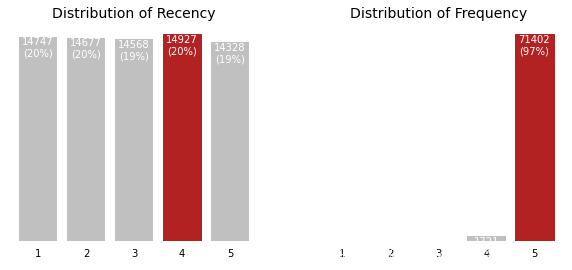

In [135]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()





Видно, что по Recency все клиенты распределены равномерно, что говорит о стабильной работе каналов привлечения.

При этом, частота покупок у 97% клиентов находится на крайне низком уровне: менее 2х покупок

##### Построим распределение клиентов по Monetary для каждого ранга Recency и Frequenct

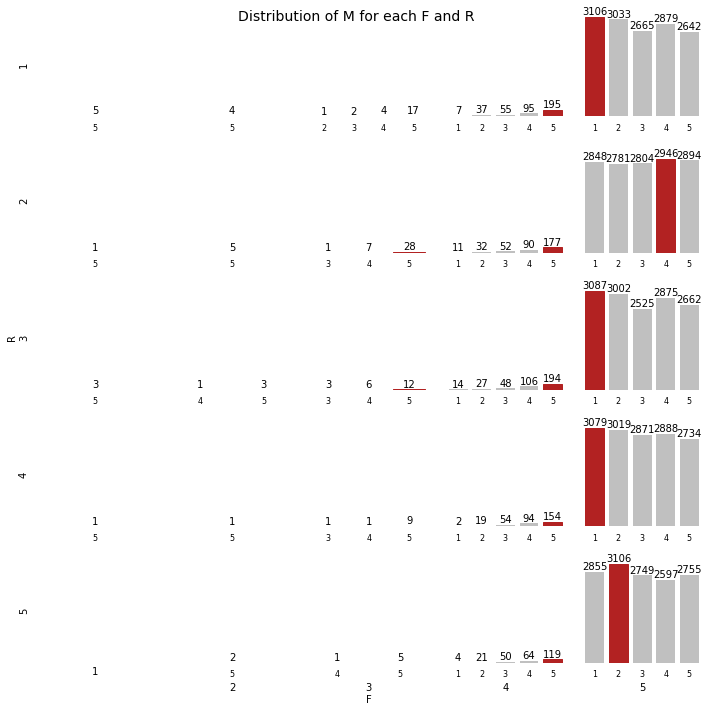

In [138]:
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

##### Определим количество клиентов в каждом из выделенных сегментов

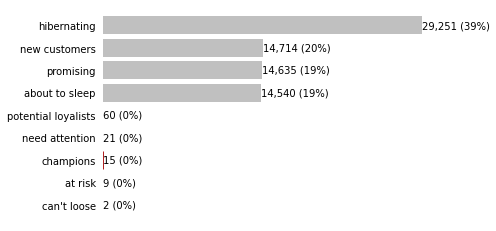

In [139]:
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

1. Как мы видим, 39% всех клиентов попадают в сегмент "Hibernating", который говорит о том, что клиенты совершали покупки давно и в ограниченном количестве. Вероятность возврата таких клиентов в продукт стремится к нулю.

2. При этом 20% клиентов составляют новые клиенты, которые только знакомятся с продуктом и на которых необходимо делать основной фокус для их дальнейшего перехода в более активные сегменты

3. Еще 19% занимают клиенты из сегмента promising, которые также, как и клиенты из сегмента New customers только знакомятся с продуктом и не совершают большого количества покупок

4. Еще 19% составляет сегмент about to sleep, в который входят клиенты, совершавшие покупки достаточно давно, но в ограниченных количествах. У них пониженные ожидания к продукту, однако их все еще можно вовлечь активными кампаниями.

5. Менее 1% составляют сегменты, генерирующие основную выручку для продукта: potential lialists, need attention, champions, at risk, can\`t loose. Это намекает на весомые проблемы в продукте

##### Выводы:

Результаты RFM анализа говорят о 2 ключевых фактах:

1. В продукте высокая эффективность каналов привлечения. В продукт активно и регулярно приходят новые пользователи и начинают знакомство с ним.
2. Сам продукт не удовлетворяет ожиданиям новых пользователей после знакомства с ним. 39% клиентов не решают продолжать пользоваться продуктом после знакомства с ним. Это может говорить о 2х проблемах: 1) В продукт приходят нерелевантные пользователи из каналов привлечения. 2) В продукте есть системные проблемы, значительно усложняющие клиентский путь.

Таким образом, рекомендуется:
    1. Сравнить портрет клиента в продукте с портретом клиента в каналах привлечения для определения расхождений. 
    2. В случае отсутствия расхождения в путке 1, детально посмотреть на клиентский путь пользователя через призму конверсии/ интервью и определить ключевые проблемы клиентов